In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_excel(r"E:\Python\Machine Learning\datasets\Concrete_Data.xls")

In [4]:
data.head()

,Cement,Blast,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [5]:
data.shape

(1030, 9)

In [6]:
data.corr()

,Cement,Blast,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly_Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse_Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine_Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [8]:
data.columns

Index(['Cement ', 'Blast ', 'Fly_Ash ', 'Water  ', 'Superplasticizer ',
       'Coarse_Aggregate  ', 'Fine_Aggregate ', 'Age', 'Strength'],
      dtype='object')

In [9]:
data.columns = [i.replace(" ", 'd') for i in data.columns]

In [10]:
data.columns

Index(['Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength'],
      dtype='object')

In [12]:
X = data.iloc[:,0:8]
y = data.iloc[:,8]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100) 

In [14]:
X_train.columns

Index(['Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age'],
      dtype='object')

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lm = LinearRegression()
lm = lm.fit(X_train, y_train)   

In [17]:
lm.coef_

array([ 0.12412584,  0.10364144,  0.09337278, -0.13472684,  0.28645156,
        0.02059513,  0.02558215,  0.11462178])

In [19]:
np.transpose(lm.coef_).shape

(8,)

In [27]:
y_train.index

Int64Index([ 337,  384,  805,  682,  329,  270,  729,   98,  152,   73,
            ...
             228,  655,  280,  752, 1009,  802,   53,  350,   79,  792],
           dtype='int64', length=824)

In [25]:
X_train.columns

Index(['Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age'],
      dtype='object')

In [21]:
coefficients = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(lm.coef_)], axis = 1)
coefficients

,0,0
0,Cement,0.124126
1,Blast,0.103641
2,Fly_Ash,0.093373
3,Water,-0.134727
4,Superplasticizer,0.286452
5,Coarse_Aggregate,0.020595
6,Fine_Aggregate,0.025582
7,Age,0.114622


In [22]:
type(coefficients)

pandas.core.frame.DataFrame

In [14]:
lm.intercept_

-34.07671967499375

In [15]:
# To predict the values of y on the test set we use lm.predict( )
y_pred = lm.predict(X_test)

In [16]:
# Errors are the difference between observed and predicted values.
y_error = y_test - y_pred
sum(y_error)

-102.69433261787876

In [17]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.6224930131827437

In [29]:
X_train.head()

,Cement,Blast,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
337,275.07,0.0,121.35,159.48,9.90,1053.6,777.50,56
384,516.00,0.0,0.00,162.00,8.20,801.0,802.00,28
805,393.00,0.0,0.00,192.00,0.00,940.0,758.00,90
682,183.90,122.6,0.00,203.50,0.00,959.2,800.00,28
329,246.83,0.0,125.08,143.30,11.99,1086.8,800.89,3


#### Running linear regression using statsmodels

In [30]:
import statsmodels.api as sa
import statsmodels.formula.api as sfm

In [31]:
X_train = sa.add_constant(X_train) ## let's add an intercept (beta_0) to our model
X_test  = sa.add_constant(X_test) 

In [32]:
X_train.head()

,const,Cement,Blast,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
337,1.0,275.07,0.0,121.35,159.48,9.90,1053.6,777.50,56
384,1.0,516.00,0.0,0.00,162.00,8.20,801.0,802.00,28
805,1.0,393.00,0.0,0.00,192.00,0.00,940.0,758.00,90
682,1.0,183.90,122.6,0.00,203.50,0.00,959.2,800.00,28
329,1.0,246.83,0.0,125.08,143.30,11.99,1086.8,800.89,3


In [20]:
X_train.columns

Index(['const', 'Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age'],
      dtype='object')

In [21]:
X_train.head()

,const,Cement,Blast,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
337,1.0,275.07,0.0,121.35,159.48,9.90,1053.6,777.50,56
384,1.0,516.00,0.0,0.00,162.00,8.20,801.0,802.00,28
805,1.0,393.00,0.0,0.00,192.00,0.00,940.0,758.00,90
682,1.0,183.90,122.6,0.00,203.50,0.00,959.2,800.00,28
329,1.0,246.83,0.0,125.08,143.30,11.99,1086.8,800.89,3


In [22]:
X_test

,const,Cement,Blast,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
173,1.0,318.80,212.5,0.00,155.70,14.300,852.10,880.40,91
134,1.0,362.60,189.0,0.00,164.90,11.600,944.70,755.80,28
822,1.0,322.00,0.0,0.00,203.00,0.000,974.00,800.00,28
264,1.0,212.00,0.0,124.78,159.00,7.840,1085.40,799.54,3
479,1.0,446.00,24.0,79.00,162.00,11.640,967.00,712.00,7
...,...,...,...,...,...,...,...,...,...
247,1.0,238.05,0.0,94.11,186.66,7.000,949.91,847.01,56
207,1.0,212.07,0.0,121.62,180.31,5.690,1057.60,779.32,56
672,1.0,173.00,116.0,0.00,192.00,0.000,946.80,856.80,3
191,1.0,233.81,0.0,94.58,197.89,4.567,947.04,852.16,28


In [23]:
y_train.shape

(824,)

In [24]:
X_train.shape

(824, 9)

In [26]:
type(data.columns)

pandas.core.indexes.base.Index

In [25]:
data.columns

Index(['Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength'],
      dtype='object')

In [26]:
data.corr()

,Cement,Blast,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Strength
Cement,1.000000,-0.275193,-0.397475,-0.081544,0.092771,-0.109356,-0.222720,0.081947,0.497833
Blast,-0.275193,1.000000,-0.323569,0.107286,0.043376,-0.283998,-0.281593,-0.044246,0.134824
Fly_Ash,-0.397475,-0.323569,1.000000,-0.257044,0.377340,-0.009977,0.079076,-0.154370,-0.105753
Water,-0.081544,0.107286,-0.257044,1.000000,-0.657464,-0.182312,-0.450635,0.277604,-0.289613
Superplasticizer,0.092771,0.043376,0.377340,-0.657464,1.000000,-0.266303,0.222501,-0.192717,0.366102
Coarse_Aggregate,-0.109356,-0.283998,-0.009977,-0.182312,-0.266303,1.000000,-0.178506,-0.003016,-0.164928
Fine_Aggregate,-0.222720,-0.281593,0.079076,-0.450635,0.222501,-0.178506,1.000000,-0.156094,-0.167249
Age,0.081947,-0.044246,-0.154370,0.277604,-0.192717,-0.003016,-0.156094,1.000000,0.328877
Strength,0.497833,0.134824,-0.105753,-0.289613,0.366102,-0.164928,-0.167249,0.328877,1.000000


In [29]:
data.columns=['Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength']

In [30]:
for i in data.columns:
    print(i)

Cement
Blast
Fly_Ash
Water
Superplasticizer
Coarse_Aggregate
Fine_Aggregate
Age
Strength


In [31]:
X_train.head()

,const,Cement,Blast,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
337,1.0,275.07,0.0,121.35,159.48,9.90,1053.6,777.50,56
384,1.0,516.00,0.0,0.00,162.00,8.20,801.0,802.00,28
805,1.0,393.00,0.0,0.00,192.00,0.00,940.0,758.00,90
682,1.0,183.90,122.6,0.00,203.50,0.00,959.2,800.00,28
329,1.0,246.83,0.0,125.08,143.30,11.99,1086.8,800.89,3


In [32]:
X_train

,const,Cement,Blast,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
337,1.0,275.07,0.0,121.35,159.48,9.90,1053.6,777.50,56
384,1.0,516.00,0.0,0.00,162.00,8.20,801.0,802.00,28
805,1.0,393.00,0.0,0.00,192.00,0.00,940.0,758.00,90
682,1.0,183.90,122.6,0.00,203.50,0.00,959.2,800.00,28
329,1.0,246.83,0.0,125.08,143.30,11.99,1086.8,800.89,3
...,...,...,...,...,...,...,...,...,...
802,1.0,339.00,0.0,0.00,185.00,0.00,1060.0,754.00,28
53,1.0,304.00,76.0,0.00,228.00,0.00,932.0,670.00,90
350,1.0,213.50,0.0,174.24,154.61,11.66,1052.3,775.48,14
79,1.0,531.30,0.0,0.00,141.80,28.20,852.1,893.70,3


In [33]:
y_train

337    56.847296
384    41.368560
805    48.794217
682    24.046165
329    23.524921
         ...    
802    31.646948
53     49.185149
350    33.701587
79     41.299612
792    42.126984
Name: Strength, Length: 824, dtype: float64

In [34]:
data.columns

Index(['Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength'],
      dtype='object')

In [14]:
data.columns  = ['Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age', 'Strength']

In [4]:
X_train.columns = ['const','Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age']

NameError: name 'X_train' is not defined

In [28]:
X_train.head()

,const,Cement,Blast,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
337,1.0,275.07,0.0,121.35,159.48,9.90,1053.6,777.50,56
384,1.0,516.00,0.0,0.00,162.00,8.20,801.0,802.00,28
805,1.0,393.00,0.0,0.00,192.00,0.00,940.0,758.00,90
682,1.0,183.90,122.6,0.00,203.50,0.00,959.2,800.00,28
329,1.0,246.83,0.0,125.08,143.30,11.99,1086.8,800.89,3


In [34]:
# Linear regression can be run by using sm.OLS:
import statsmodels.api as sa
lm2 = sa.OLS(y_train, X_train).fit()

In [35]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     161.0
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          4.66e-162
Time:                        15:05:14   Log-Likelihood:                -3090.5
No. Observations:                 824   AIC:                             6199.
Df Residuals:                     815   BIC:                             6241.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -34.0767     29.934     -1.138      0.255     -92.834      24.681
Cement               0.1241      0.010     13.050      0.000       0.105       0.143
Blast                0.1036      0.011      9.227      0.000       0.082       0.126
Fly_Ash              0.0934      0.014      6.686      0.000       0.066       0.121
Water               -0.1347      0.046     -2.957      0.003      -0.224      -0.045
Superplasticizer     0.2865      0.103      2.794      0.005       0.085       0.488
Coarse_Aggregate     0.0206      0.011      1.959      0.050   -3.88e-05       0.041
Fine_Aggregate       0.0256      0.012      2.127      0.034       0.002       0.049
Age                  0.1146      0.006     19.063      0.000       0.103       0.126
==============================================================================
Omnibus:                        3.756   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.153   Jarque-Bera (JB):                3.760
Skew:                          -0.165   Prob(JB):                        0.153
Kurtosis:                       2.974   Cond. No.                     1.07e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.07e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [31]:
if 1.07e+05 < 0.05:
    print("reject")
else:
    print('accept')

accept


In [21]:
#lm2 = sfm.ols(y_train, X_train).fit()

In [32]:
import statsmodels.formula.api as sfm
lm3 = sfm.ols(formula = "Strength ~ Cement + Blast + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Fine_Aggregate + Age ",
              data = data).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 07 Dec 2022   Prob (F-statistic):          6.76e-206
Time:                        12:28:48   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -23.1638     26.588     -0.871      0.384     -75.338      29.010
Cement               0.1198      0.008     14.110      0.000       0.103       0.136
Blast                0.1038      0.010     10.245      0.000       0.084       0.124
Fly_Ash              0.0879      0.013      6.988      0.000       0.063       0.113
Water               -0.1503      0.040     -3.741      0.000      -0.229      -0.071
Superplasticizer     0.2907      0.093      3.110      0.002       0.107       0.474
Coarse_Aggregate     0.0180      0.009      1.919      0.055      -0.000       0.036
Fine_Aggregate       0.0202      0.011      1.883      0.060      -0.001       0.041
Age                  0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.305
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [28]:
lm2.pvalues

Cement                1.945787e-99
Blast                 2.890399e-50
Fly_Ash               2.903239e-19
Water                 4.158237e-23
Superplasticizer      1.082411e-02
Coarse_Aggregate      6.870618e-03
Fine_Aggregate        1.377657e-03
Age                   3.654015e-67
dtype: float64

In [23]:
lm4 = sfm.ols(formula = "Strength ~ Cement + Blast + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Fine_Aggregate + Age ", 
              data = data)

In [24]:
sfm.ols(formula = "Strength ~ Cement + Blast + Fly_Ash + Water + Superplasticizer + Coarse_Aggregate + Fine_Aggregate + Age ", data = data)

In [25]:
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.615
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     204.3
Date:                Wed, 03 Aug 2022   Prob (F-statistic):          6.76e-206
Time:                        10:30:41   Log-Likelihood:                -3869.0
No. Observations:                1030   AIC:                             7756.
Df Residuals:                    1021   BIC:                             7800.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -23.1638     26.588     -0.871      0.384     -75.338      29.010
Cement               0.1198      0.008     14.110      0.000       0.103       0.136
Blast                0.1038      0.010     10.245      0.000       0.084       0.124
Fly_Ash              0.0879      0.013      6.988      0.000       0.063       0.113
Water               -0.1503      0.040     -3.741      0.000      -0.229      -0.071
Superplasticizer     0.2907      0.093      3.110      0.002       0.107       0.474
Coarse_Aggregate     0.0180      0.009      1.919      0.055      -0.000       0.036
Fine_Aggregate       0.0202      0.011      1.883      0.060      -0.001       0.041
Age                  0.1142      0.005     21.046      0.000       0.104       0.125
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.305
Skew:                          -0.174   Prob(JB):                       0.0705
Kurtosis:                       3.045   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:               Strength   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                              1403.
Date:                Wed, 03 Aug 2022   Prob (F-statistic):                        0.00
Time:                        10:30:44   Log-Likelihood:                         -3091.1
No. Observations:                 824   AIC:                                      6198.
Df Residuals:                     816   BIC:                                      6236.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Cement                 0.1147      0.005     24.443      0.000       0.105       0.124
Blast                  0.0927      0.006     15.990      0.000       0.081       0.104
Fly_Ash                0.0810      0.009      9.201      0.000       0.064       0.098
Water                 -0.1824      0.018    -10.208      0.000      -0.218      -0.147
Superplasticizer       0.2439      0.095      2.554      0.011       0.056       0.431
Coarse_Aggregate       0.0093      0.003      2.710      0.007       0.003       0.016
Fine_Aggregate         0.0126      0.004      3.210      0.001       0.005       0.020
Age                    0.1145      0.006     19.040      0.000       0.103       0.126
==============================================================================
Omnibus:                        3.937   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.140   Jarque-Bera (JB):                3.964
Skew:                          -0.169   Prob(JB):                        0.138
Kurtosis:                       2.959   Cond. No.                         345.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
y_pred2 = lm2.predict(X_test) 

#### Detecting and Removing Multicollinearity 

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
X_train.shape[1]

8

In [47]:
[j for j in range(X_train.shape[1])]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [33]:
X_train.values

array([[ 275.07,    0.  ,  121.35, ..., 1053.6 ,  777.5 ,   56.  ],
       [ 516.  ,    0.  ,    0.  , ...,  801.  ,  802.  ,   28.  ],
       [ 393.  ,    0.  ,    0.  , ...,  940.  ,  758.  ,   90.  ],
       ...,
       [ 213.5 ,    0.  ,  174.24, ..., 1052.3 ,  775.48,   14.  ],
       [ 531.3 ,    0.  ,    0.  , ...,  852.1 ,  893.7 ,    3.  ],
       [ 349.  ,    0.  ,    0.  , ..., 1047.  ,  806.  ,  360.  ]])

In [34]:
X_train.values

array([[1.0000e+00, 2.7507e+02, 0.0000e+00, ..., 1.0536e+03, 7.7750e+02,
        5.6000e+01],
       [1.0000e+00, 5.1600e+02, 0.0000e+00, ..., 8.0100e+02, 8.0200e+02,
        2.8000e+01],
       [1.0000e+00, 3.9300e+02, 0.0000e+00, ..., 9.4000e+02, 7.5800e+02,
        9.0000e+01],
       ...,
       [1.0000e+00, 2.1350e+02, 0.0000e+00, ..., 1.0523e+03, 7.7548e+02,
        1.4000e+01],
       [1.0000e+00, 5.3130e+02, 0.0000e+00, ..., 8.5210e+02, 8.9370e+02,
        3.0000e+00],
       [1.0000e+00, 3.4900e+02, 0.0000e+00, ..., 1.0470e+03, 8.0600e+02,
        3.6000e+02]])

In [49]:
[variance_inflation_factor(X_train.values,j) for j in range(X_train.shape[1])]

[6890.634164727126,
 7.659587243196392,
 7.235157552063944,
 6.1017572008700665,
 7.190429933187499,
 2.9423447864400454,
 5.047804394278203,
 7.015296551967477,
 1.1029661494217335]

In [36]:
col = X_train.columns
col=col.to_list()
col

['const',
 'Cement',
 'Blast',
 'Fly_Ash',
 'Water',
 'Superplasticizer',
 'Coarse_Aggregate',
 'Fine_Aggregate',
 'Age']

In [37]:
vif = [variance_inflation_factor(X_train.values, j) for j in range(X_train.shape[1])]
vif

[6890.634164727126,
 7.659587243196392,
 7.235157552063944,
 6.1017572008700665,
 7.190429933187499,
 2.9423447864400454,
 5.047804394278203,
 7.015296551967477,
 1.1029661494217335]

In [52]:
list(zip(col,vif))

[('const', 6890.634164727126),
 ('Cement', 7.659587243196392),
 ('Blast', 7.235157552063944),
 ('Fly_Ash', 6.1017572008700665),
 ('Water', 7.190429933187499),
 ('Superplasticizer', 2.9423447864400454),
 ('Coarse_Aggregate', 5.047804394278203),
 ('Fine_Aggregate', 7.015296551967477),
 ('Age', 1.1029661494217335)]

In [44]:
np.argmax(vif)

0

In [54]:
col.pop(3), vif.pop(3)

('Fly_Ash', 6.1017572008700665)

In [55]:
list(zip(col,vif))

[('const', 6890.634164727126),
 ('Cement', 7.659587243196392),
 ('Blast', 7.235157552063944),
 ('Water', 7.190429933187499),
 ('Superplasticizer', 2.9423447864400454),
 ('Coarse_Aggregate', 5.047804394278203),
 ('Fine_Aggregate', 7.015296551967477),
 ('Age', 1.1029661494217335)]

In [56]:
col.to_list()

AttributeError: 'list' object has no attribute 'to_list'

In [43]:
vif[3]

6.1017572008700665

In [38]:
vif[0]<=5

False

In [59]:
# Returns indices of the max element of the array in a particular axis.
np.argmax(vif)

0

In [60]:
X_train.columns

Index(['const', 'Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age'],
      dtype='object')

- create a function to remove the collinear variables. 

- choose a threshold of 5 which means if VIF is more than 5 for a particular variable then that variable will be removed.

In [61]:
a= pd.DataFrame()
a

""


In [48]:
X_train.shape

(824, 9)

In [ ]:
calculate_vif(X_train)

In [62]:
#np.argmax([10,120,150,16]

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(x):
    thresh = 5.0
    output = pd.DataFrame()
    k = x.shape[1]
    dropped_columns = []
    
    vif = [variance_inflation_factor(x.values, j) for j in range(x.shape[1])]
    
    
    for i in range(1,k):
        print(vif)
        # Returns indices of the max element of the array in a particular axis.
        a = np.argmax(vif)
        print("==>Iteration no.", i)
        #print("Max VIF is for variable no.:", a)
        
        if vif[a] <= thresh :
            break
            
        if i == 1 :          
            output = x.drop(x.columns[a], axis = 1)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
            print(x.columns[a])
            dropped_columns.append(x.columns[a]) 
            #print(output.columns, x.columns)
        elif i > 1 :
            print(a)
            output.drop(output.columns[a], axis = 1, inplace = True)
            vif = [variance_inflation_factor(output.values, j) for j in range(output.shape[1])]
            print(output.columns[a])
            
            dropped_columns.append(output.columns[a]) 
        
        #print("dropping columns",dropped_columns)
        #print("output columns", output.columns)
        #print('X-columns', x.columns)
        
        #print("#######################\n#######################")
    return(output, dropped_columns)


In [53]:
train_out, dropped_columns = calculate_vif(X_train) 

[6890.634164727126, 7.659587243196392, 7.235157552063944, 6.1017572008700665, 7.190429933187499, 2.9423447864400454, 5.047804394278203, 7.015296551967477, 1.1029661494217335]
==>Iteration no. 1
const
[15.489323657296117, 3.2841945403134463, 4.130080894939746, 82.3068345875822, 5.217852069859374, 85.95487694415172, 71.86702257797346, 1.6844183351414324]
==>Iteration no. 2
5
Fine_Aggregate
[14.528308142525988, 3.2616673939300025, 3.969045651556572, 71.62021186089818, 5.176194099020355, 48.297352134991144, 1.6843904736568205]
==>Iteration no. 3
3
Superplasticizer
[9.391493698003837, 2.0852683834405235, 3.009459473501846, 2.906064890786732, 14.431299351196236, 1.5710036295711989]
==>Iteration no. 4
4
Age
[2.6947861184699864, 1.5254903505923516, 1.903355142672513, 2.8855296572756295, 1.5370957038434814]
==>Iteration no. 5


In [48]:
X_train.columns

Index(['const', 'Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age'],
      dtype='object')

In [49]:
dropped_columns

['const', 'Fine_Aggregate', 'Superplasticizer', 'Age']

In [82]:
print(train_out.drop("Age", axis= 1, inplace = True))

None


In [50]:
train_out

,Cement,Blast,Fly_Ash,Superplasticizer,Age
337,275.07,0.0,121.35,9.90,56
384,516.00,0.0,0.00,8.20,28
805,393.00,0.0,0.00,0.00,90
682,183.90,122.6,0.00,0.00,28
329,246.83,0.0,125.08,11.99,3
...,...,...,...,...,...
802,339.00,0.0,0.00,0.00,28
53,304.00,76.0,0.00,0.00,90
350,213.50,0.0,174.24,11.66,14
79,531.30,0.0,0.00,28.20,3


In [68]:
X_train.columns

Index(['const', 'Cement', 'Blast', 'Fly_Ash', 'Water', 'Superplasticizer',
       'Coarse_Aggregate', 'Fine_Aggregate', 'Age'],
      dtype='object')

In [49]:
dropped_columns

['const', 'Superplasticizer', 'Fly_Ash', 'Water']

In [90]:
train_out.head()

,Cement,Blast,Fly_Ash,Superplasticizer,Age
337,275.07,0.0,121.35,9.90,56
384,516.00,0.0,0.00,8.20,28
805,393.00,0.0,0.00,0.00,90
682,183.90,122.6,0.00,0.00,28
329,246.83,0.0,125.08,11.99,3


In [50]:
X_test.head()

,const,Cement,Blast,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age
173,1.0,318.8,212.5,0.00,155.7,14.30,852.1,880.40,91
134,1.0,362.6,189.0,0.00,164.9,11.60,944.7,755.80,28
822,1.0,322.0,0.0,0.00,203.0,0.00,974.0,800.00,28
264,1.0,212.0,0.0,124.78,159.0,7.84,1085.4,799.54,3
479,1.0,446.0,24.0,79.00,162.0,11.64,967.0,712.00,7


In [51]:
X_test.columns= ['const', 'Cement ', 'Blast ', 'Fly_Ash', 'Water',
       'Superplasticizer', 'Coarse_Aggregate', 'Fine_Aggregate', 'Age']

In [52]:
dropped_columns

['const', 'Superplasticizer', 'Fly_Ash', 'Water']

In [53]:
X_test.drop(dropped_columns, axis = 1, inplace = True)

In [54]:
X_test.head()

,Cement,Blast,Coarse_Aggregate,Fine_Aggregate,Age
173,318.8,212.5,852.1,880.40,91
134,362.6,189.0,944.7,755.80,28
822,322.0,0.0,974.0,800.00,28
264,212.0,0.0,1085.4,799.54,3
479,446.0,24.0,967.0,712.00,7


In [55]:
train_out.columns

Index(['Cement', 'Blast', 'Fly_Ash', 'Superplasticizer', 'Age'], dtype='object')

In [52]:
train_out.corr()

,Cement,Blast,Fly_Ash,Superplasticizer,Age
Cement,1.000000,-0.278711,-0.399873,0.072083,0.048261
Blast,-0.278711,1.000000,-0.328539,0.041642,-0.018399
Fly_Ash,-0.399873,-0.328539,1.000000,0.389289,-0.149583
Superplasticizer,0.072083,0.041642,0.389289,1.000000,-0.193529
Age,0.048261,-0.018399,-0.149583,-0.193529,1.000000


#### Running linear regression again on our new training set (without multicollinearity)

In [55]:
train_out = sa.add_constant(train_out) ## let's add an intercept (beta_0) to our model

X_test    = sa.add_constant(X_test)

lm2 = sa.OLS(y_train, train_out).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Strength   R-squared:                       0.570
Model:                            OLS   Adj. R-squared:                  0.567
Method:                 Least Squares   F-statistic:                     216.7
Date:                Tue, 20 Dec 2022   Prob (F-statistic):          4.06e-147
Time:                        16:38:45   Log-Likelihood:                -3133.5
No. Observations:                 824   AIC:                             6279.
Df Residuals:                     818   BIC:                             6307.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const              -11.1582      1.917     -5.821      0.000     -14.921      -7.395
Cement               0.1032      0.005     20.931      0.000       0.094       0.113
Blast                0.0716      0.006     12.539      0.000       0.060       0.083
Fly_Ash              0.0614      0.009      6.745      0.000       0.044       0.079
Superplasticizer     0.7555      0.077      9.778      0.000       0.604       0.907
Age                  0.1024      0.006     16.616      0.000       0.090       0.115
==============================================================================
Omnibus:                        0.897   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.639   Jarque-Bera (JB):                0.968
Skew:                           0.038   Prob(JB):                        0.616
Kurtosis:                       2.850   Cond. No.                     1.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
X_test.shape,  y_test.shape

((206, 6), (206, 1))

In [58]:
#lm2 = sa.OLS(y_train, X_test).fit()
#lm2.summary()

In [59]:
train_out

,const,Cement,Blast,Fly_Ash,Superplasticizer,Age
337,1.0,275.07,0.0,121.35,9.90,56
384,1.0,516.00,0.0,0.00,8.20,28
805,1.0,393.00,0.0,0.00,0.00,90
682,1.0,183.90,122.6,0.00,0.00,28
329,1.0,246.83,0.0,125.08,11.99,3
...,...,...,...,...,...,...
802,1.0,339.00,0.0,0.00,0.00,28
53,1.0,304.00,76.0,0.00,0.00,90
350,1.0,213.50,0.0,174.24,11.66,14
79,1.0,531.30,0.0,0.00,28.20,3


#### Checking normality of residuals 

We use Shapiro Wilk test  from scipy library to check the normality of residuals.

Null Hypothesis: The residuals are normally distributed.

Alternative Hypothesis: The residuals are not normally distributed.

In [60]:
from scipy import stats
stats.shapiro(lm2.resid)

ShapiroResult(statistic=0.9983593225479126, pvalue=0.6363931894302368)

Since the pvalue is 0.6269 thus at 5% level of significance we can say that the residuals are normally distributed.

<AxesSubplot:ylabel='Density'>

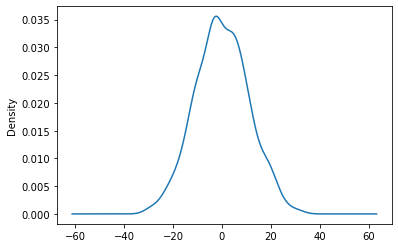

In [61]:
lm2.resid.plot(kind = 'density')

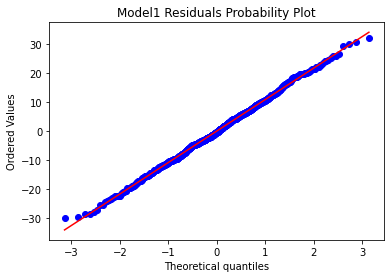

In [63]:
stats.probplot(lm2.resid, plot= plt)
plt.title("Model1 Residuals Probability Plot");

In [66]:
stats.kstest(lm2.resid, 'norm')[1]

3.359211268977442e-136

In [68]:
if stats.kstest(lm2.resid)[1] < 0.05:
    print("reject null")

TypeError: kstest() missing 1 required positional argument: 'cdf'